# ML Project (Grapevine Dataset Analysis)

**Step 1**: Importing the required libraries

**cv2** : image processing library ,
        **SVC** : support vector machines , 
        **GaussianNB** : Naive bais ,
        **Random Forest CLassifier** : random forest 

In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt


# Assuming the dataset directory is at "/path/to/your/dataset" (replace with actual path)
dataset_dir = "/kaggle/input/grapevine-image-dataset/Grapevine_Leaves_Image_Dataset"

**Step 2**: Defining a function to preprocess and extract features form the images

The **cvtcolor** funtion convert the images from BGR color space to HSR color space beacuse they have better feature segmentaion and colour variations which make it easier to classify the image.
The **split** function splits the image colors into indivisual channels.
The **calcHist** function then calculate the histogram for each channel followed by conactenating the histograms to get a single vector value for classification.

In [2]:
def preprocess_and_extract_features(img):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist_features = []
    for channel in cv2.split(hsv_img):
        hist_features.extend(cv2.calcHist([channel], [0], None, [256], [0, 256]))
    return np.concatenate(hist_features)

**Step 3**: Converting the file paths into a dataset and then appending the feature names and the image paths to X and Y in the form of a list.

In [3]:
X = []
y = []

# Iterate through each category in the dataset directory
categories = os.listdir(dataset_dir)
for category in categories:
    category_dir = os.path.join(dataset_dir, category)

    # Check if category_dir is a directory (skip non-directory files)
    if os.path.isdir(category_dir):
        for filename in os.listdir(category_dir):
            img_path = os.path.join(category_dir, filename)

            # Read image in BGR format (default for OpenCV)
            img = cv2.imread(img_path)

            features = preprocess_and_extract_features(img)

            # Append features and corresponding label (category name)
            X.append(features)
            y.append(category)

**Step 4:** Convert lists to NumPy arrays for efficient processing followed by splitting the training and testing data


In [4]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

**Step 5**: Running the Naive bias algorithim

In [5]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")
print(classification_report(y_test, y_pred))

Accuracy: 62.0 %
              precision    recall  f1-score   support

          Ak       0.48      0.88      0.62        17
   Ala_Idris       0.90      0.75      0.82        24
     Buzgulu       0.89      0.44      0.59        18
      Dimnit       0.47      0.45      0.46        20
       Nazli       0.57      0.57      0.57        21

    accuracy                           0.62       100
   macro avg       0.66      0.62      0.61       100
weighted avg       0.67      0.62      0.62       100



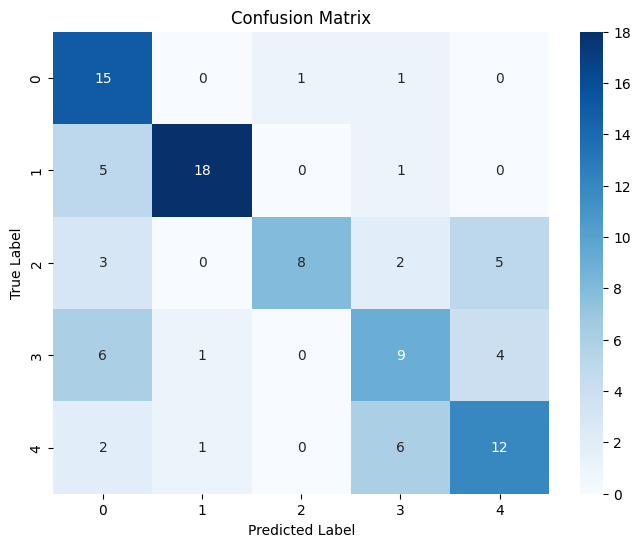

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Hyperparameter Tuning**  optimizes model performance by finding the best settings that balance complexity and generalization, mitigating issues like overfitting and underfitting, ultimately enhancing model accuracy and robustness. 

In [7]:
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1]
}

**Step 6**: Running the support vector machine algorithim

In [8]:
svm_classifier = SVC(random_state=30)
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")
print(classification_report(y_test, y_pred))

Accuracy: 80.0 %
              precision    recall  f1-score   support

          Ak       0.79      0.88      0.83        17
   Ala_Idris       0.74      0.83      0.78        24
     Buzgulu       0.88      0.83      0.86        18
      Dimnit       0.76      0.65      0.70        20
       Nazli       0.85      0.81      0.83        21

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



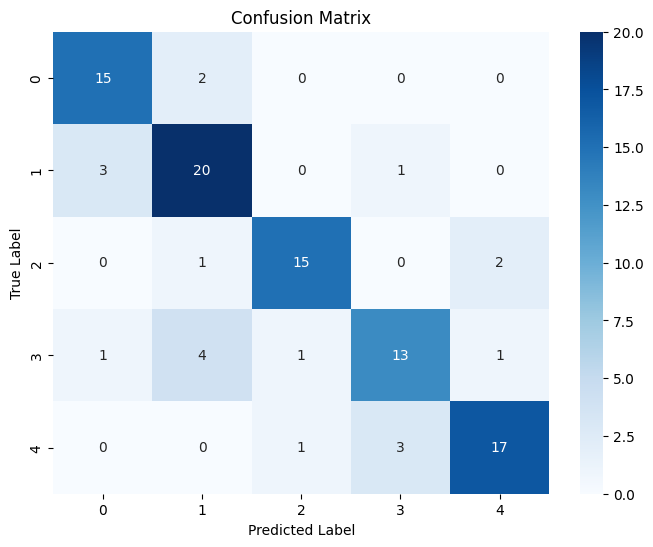

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Step 7**: Running the Random Forest Algorithim

In [10]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=30)
random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")
print(classification_report(y_test, y_pred))

Accuracy: 84.0 %
              precision    recall  f1-score   support

          Ak       0.89      0.94      0.91        17
   Ala_Idris       0.95      0.83      0.89        24
     Buzgulu       0.84      0.89      0.86        18
      Dimnit       0.70      0.80      0.74        20
       Nazli       0.84      0.76      0.80        21

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



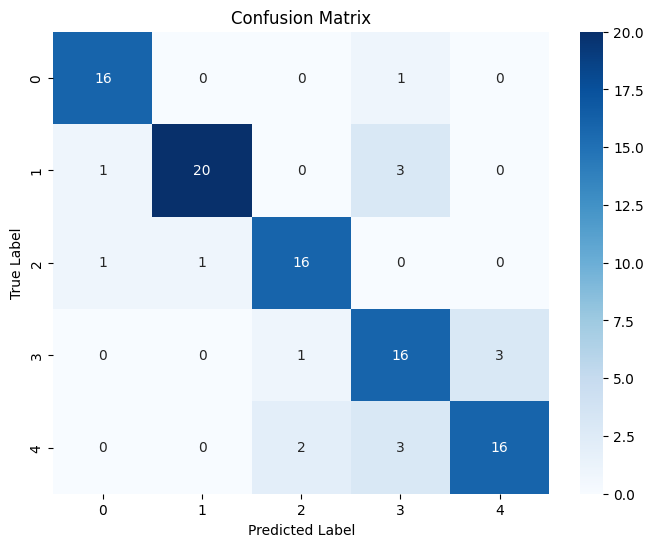

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Step 8**: Comparison between the accuracy of the three algorithims

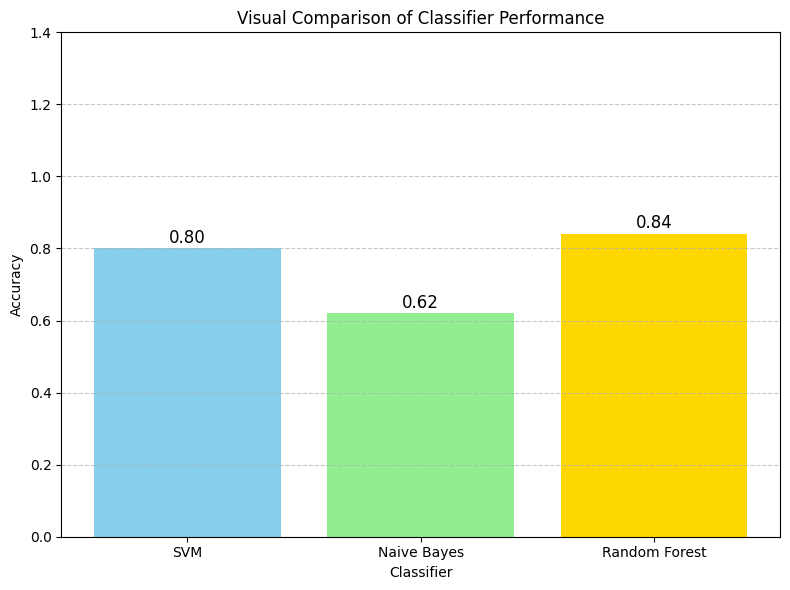

In [12]:
accuracy_svm = 0.80  
accuracy_naive_bayes = 0.62
accuracy_random_forest = 0.84  

classifier_names = ['SVM', 'Naive Bayes', 'Random Forest']
accuracy_values = [accuracy_svm, accuracy_naive_bayes, accuracy_random_forest]

plt.figure(figsize=(8, 6))
plt.bar(classifier_names, accuracy_values, color=['skyblue', 'lightgreen', 'gold'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Visual Comparison of Classifier Performance')
plt.ylim(0, 1.4)  

for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()